In [ ]:
#Import relevant libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC

In [ ]:
df=pd.read_excel('DTC_IMP.xlsx')

In [ ]:
# Step 3: Standardize the 'Date' column
def parse_date(date_str):
    for fmt in ("%d.%m.%Y", "%d.%m.%y", "%d-%m-%Y", "%d-%m-%y"):
        try:
            return datetime.strptime(str(date_str), fmt)
        except:
            continue
    return pd.NaT

df['Date'] = df['Date'].apply(parse_date)


# Step 4: Save the cleaned dataset
df.to_excel("DATA_IMP_cleaned.xlsx", index=False)

print("✅ Date cleaned and saved to 'DATA_IMP_cleaned.xlsx'")

✅ Date cleaned and saved to 'DATA_IMP_cleaned.xlsx'


In [ ]:
df.head()  #first 5 data col

,S.no.,Depot Name,Bus No.,Route No.,Sch.KMs,Act.KMs,Miss KMs due to BD only,Other Reasons,Breakdown Time,Put-on road time,Breakdown location,Exact Reason of breakdown,Corrective action taken by DMs,Repeated or single instance during the week,BD whether reported to Depot Control/Regional Contrl/CCR,Date
0,1,SNPD,9201,794/21A,116,62,41,13,23:05:00,01:15:00,NZMD Rly.Stn.,Coolant Throw,Coolant Pipe Refitted,1,Control Room,2023-04-26
1,2,SNPD,9303,966/19 + 966/21A,121,80,36,5,09:50:00,11:45:00,Shivaji Stadium,Br.Pr.Leak,Br.Pr.Pipe Refitted,1,Control Room,2023-04-26
2,3,SNPD,9174,8A/4,116,72,44,0,10:00:00,12:25:00,Noida Ph-2,Break Defect,Br. Adjust,1,Control Room,2023-04-26
3,4,SNPD,9199,374/6,120,66,40,14,10:00:00,12:05:00,Nand Nagri (T),LNP,ICM Coupler Pin Adjust,1,Control Room,2023-04-26
4,5,SNPD,9187,794/9,116,102,14,0,11:15:00,12:15:00,NZMD Rly.Stn.,S.T,OEM Coupler Pin Adjust,1,Control Room,2023-04-26


In [ ]:
df.tail() #last 5 data rows

,S.no.,Depot Name,Bus No.,Route No.,Sch.KMs,Act.KMs,Miss KMs due to BD only,Other Reasons,Breakdown Time,Put-on road time,Breakdown location,Exact Reason of breakdown,Corrective action taken by DMs,Repeated or single instance during the week,BD whether reported to Depot Control/Regional Contrl/CCR,Date
7824,7825,SNPD,9079,2025-09-03 00:00:00,100,50,50,0,12:55:00,14:30:00,Sarai Kale Khan,Ac Def.,STD,1,Control Room,NaT
7825,7826,SNPD,9184,966/24A,110,32,71,7,16:45:00,18:05:00,Bhogal Stand,Ac Fan Belt Bkn.,STD,2,Control Room,NaT
7826,7827,SNPD,9085,764/16A,115,46,45,24,16:45:00,19:00:00,Madhu Vihar,Bellow Down,Bellow Hight Adjust,1,Control Room,NaT
7827,7828,SNPD,9190,450/4A,115,14,101,0,16:50:00,18:50:00,Bharti Nagar,S.T-2,Fcv Wire Clean,2,Control Room,NaT
7828,7829,SNPD,9221,BP/19A,121,4,117,0,17:45:00,22:30:00,Ashram,Engine Fan Belt Bkn.,Belt Change,2,Control Room,NaT


In [ ]:
# Clean column names
df.columns = df.columns.str.strip().str.replace('.', '', regex=False)


In [ ]:
# Create MonthYear column
df['MonthYear'] = df['Date'].dt.to_period('M')

In [ ]:
print(df.columns.tolist())

['Sno', 'Depot Name', 'Bus No', 'Route No', 'SchKMs', 'ActKMs', 'Miss KMs due to BD only', 'Other Reasons', 'Breakdown Time', 'Put-on road time', 'Breakdown location', 'Exact Reason of breakdown', 'Corrective action taken by DMs', 'Repeated or single instance during the week', 'BD whether reported to Depot Control/Regional Contrl/CCR', 'Date', 'MonthYear']


In [ ]:
df.dtypes

,0
Sno,int64
Depot Name,object
Bus No,object
Route No,object
SchKMs,object
ActKMs,object
Miss KMs due to BD only,object
Other Reasons,object
Breakdown Time,object
Put-on road time,object


In [ ]:
len(df.index)


7829

In [ ]:
df.isna().any()

,0
Sno,False
Depot Name,False
Bus No,False
Route No,False
SchKMs,False
ActKMs,False
Miss KMs due to BD only,False
Other Reasons,False
Breakdown Time,True
Put-on road time,False


In [ ]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df'

# Convert relevant columns to numeric, handling potential errors
df['Miss KMs due to BD only'] = pd.to_numeric(df['Miss KMs due to BD only'], errors='coerce')
df['SchKMs'] = pd.to_numeric(df['SchKMs'], errors='coerce')

# Now proceed with the groupby and aggregation using the CORRECT column names
monthly_summary = df.groupby('MonthYear').agg({
    'Miss KMs due to BD only': 'sum',
    'SchKMs': 'sum',
    'Bus No': 'count'  # Using the correct column name 'Bus No'
}).rename(columns={
    'Miss KMs due to BD only': 'Total Miss KMs',
    'SchKMs': 'Total Sch. KMs',
    'Bus No': 'Breakdown Count'  # Using the correct column name 'Bus No'
})

# Reset index to use MonthYear as a column
monthly_summary = monthly_summary.reset_index()

# Display the summary
print(monthly_summary)

   MonthYear  Total Miss KMs  Total Sch. KMs  Breakdown Count
0    2023-04          2179.0          5749.0               50
1    2023-05         25495.0         54307.0              477
2    2023-06         25240.0         56956.0              490
3    2023-07         24336.0         50942.0              433
4    2023-08         20541.0         46713.0              407
5    2023-09         11896.0         27139.0              238
6    2023-10         12042.0         29185.0              252
7    2023-11          5248.0         14279.0              123
8    2023-12          6835.0         17061.0              148
9    2024-01          4896.0         13628.0              121
10   2024-02          1314.0          4369.0               38
11   2024-03          6059.0         16264.0              143
12   2024-04          3587.0          8598.0               75
13   2024-05          2534.0          6343.0               56
14   2024-06          5467.0         10746.0               94
15   202

In [ ]:
monthly_breakdown_count = df.groupby('MonthYear')['Bus No'].count()


Number of Breakdowns per Month:
MonthYear
2023-04     50
2023-05    477
2023-06    490
2023-07    433
2023-08    407
2023-09    238
2023-10    252
2023-11    123
2023-12    148
2024-01    121
2024-02     38
2024-03    143
2024-04     75
2024-05     56
2024-06     94
2024-07     42
2024-08     39
2024-09     25
2024-10     40
Freq: M, Name: Bus No, dtype: int64


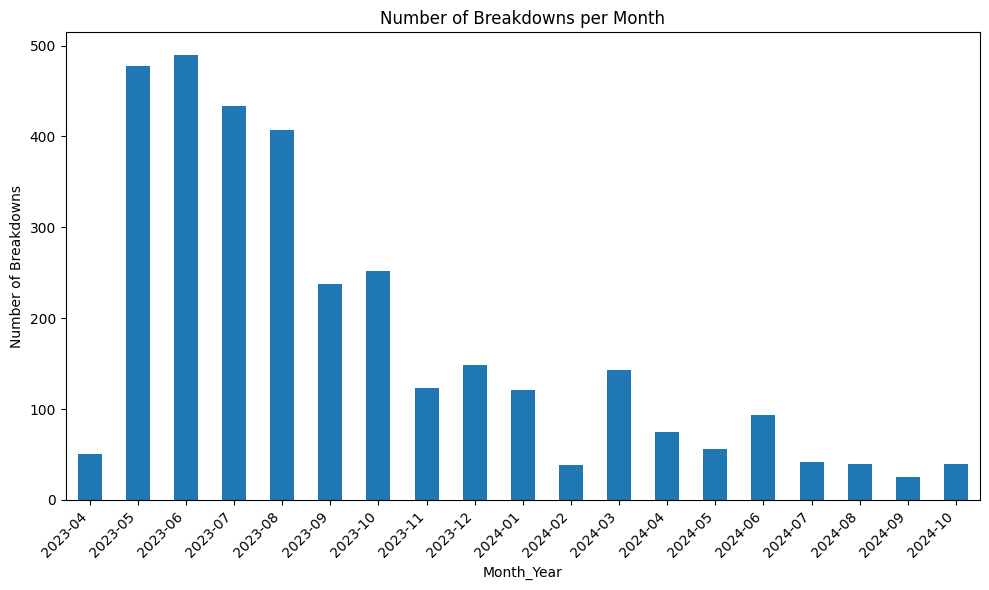

In [ ]:

print("\nNumber of Breakdowns per Month:")
print(monthly_breakdown_count)

plt.figure(figsize=(10, 6))
monthly_breakdown_count.plot(kind='bar')
plt.title('Number of Breakdowns per Month')
plt.xlabel('Month_Year')
plt.ylabel('Number of Breakdowns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# --- Breakdown Rate Trend (Missed KMs vs Scheduled KMs over months) ---

# Ensure 'Miss_KMs_due_to_BD_only' and 'SchKMs' are numeric
df['SchKMs'] = pd.to_numeric(df['SchKMs'], errors='coerce')

monthly_kms = df.groupby('MonthYear').agg(

    total_scheduled_kms=('SchKMs', 'sum')
)


Breakdown Rate Trend (Missed KMs vs Scheduled KMs over Months):
   MonthYear  Total Miss KMs  Total Sch. KMs  Breakdown Count  Breakdown Rate
0    2023-04          2179.0          5749.0               50        0.379022
1    2023-05         25495.0         54307.0              477        0.469461
2    2023-06         25240.0         56956.0              490        0.443149
3    2023-07         24336.0         50942.0              433        0.477720
4    2023-08         20541.0         46713.0              407        0.439728
5    2023-09         11896.0         27139.0              238        0.438336
6    2023-10         12042.0         29185.0              252        0.412609
7    2023-11          5248.0         14279.0              123        0.367533
8    2023-12          6835.0         17061.0              148        0.400621
9    2024-01          4896.0         13628.0              121        0.359260
10   2024-02          1314.0          4369.0               38        0.300755

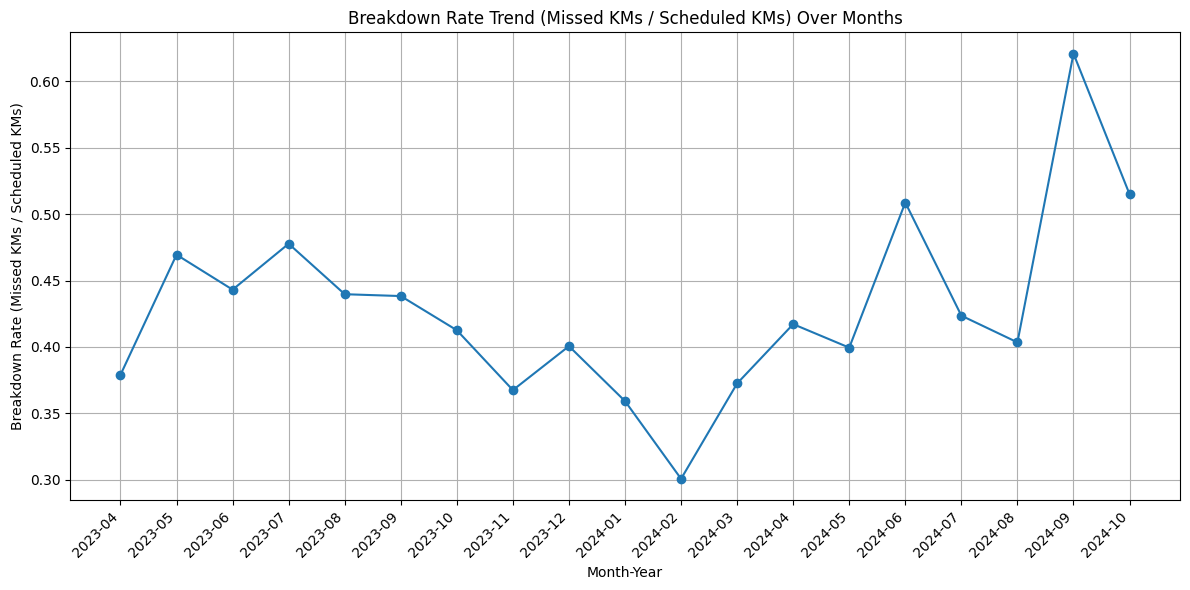

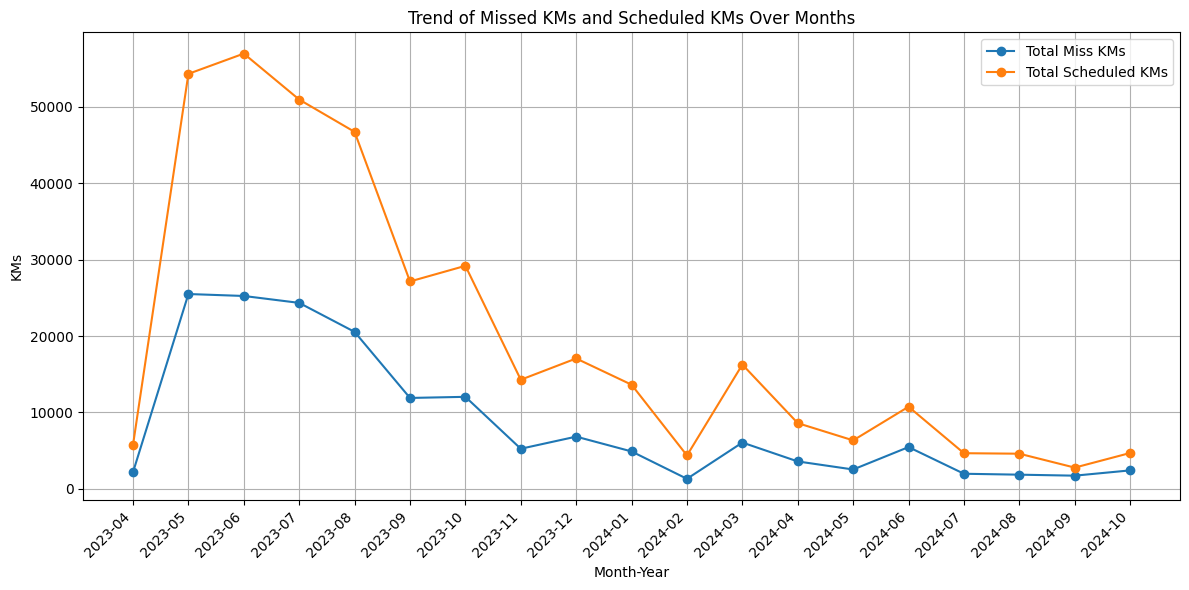

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'monthly_summary' is the DataFrame from the previous code

# Calculate breakdown rate (as a proportion of total Miss KMs to total Sch. KMs)
monthly_summary['Breakdown Rate'] = monthly_summary['Total Miss KMs'] / monthly_summary['Total Sch. KMs']

print("\nBreakdown Rate Trend (Missed KMs vs Scheduled KMs over Months):")
print(monthly_summary)

plt.figure(figsize=(12, 6))
plt.plot(monthly_summary['MonthYear'].astype(str), monthly_summary['Breakdown Rate'], marker='o')
plt.title('Breakdown Rate Trend (Missed KMs / Scheduled KMs) Over Months')
plt.xlabel('Month-Year')
plt.ylabel('Breakdown Rate (Missed KMs / Scheduled KMs)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.plot(monthly_summary['MonthYear'].astype(str), monthly_summary['Total Miss KMs'], label='Total Miss KMs', marker='o')
plt.plot(monthly_summary['MonthYear'].astype(str), monthly_summary['Total Sch. KMs'], label='Total Scheduled KMs', marker='o')
plt.xlabel('Month-Year')
plt.ylabel('KMs')
plt.title('Trend of Missed KMs and Scheduled KMs Over Months')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Breakdown Count per Bus Number:
Bus No
9302    117
9310    112
9201    110
9311    110
9183    109
       ... 
9201      1
9208      1
NIL       1
NILL      1
Nil       1
Length: 130, dtype: int64


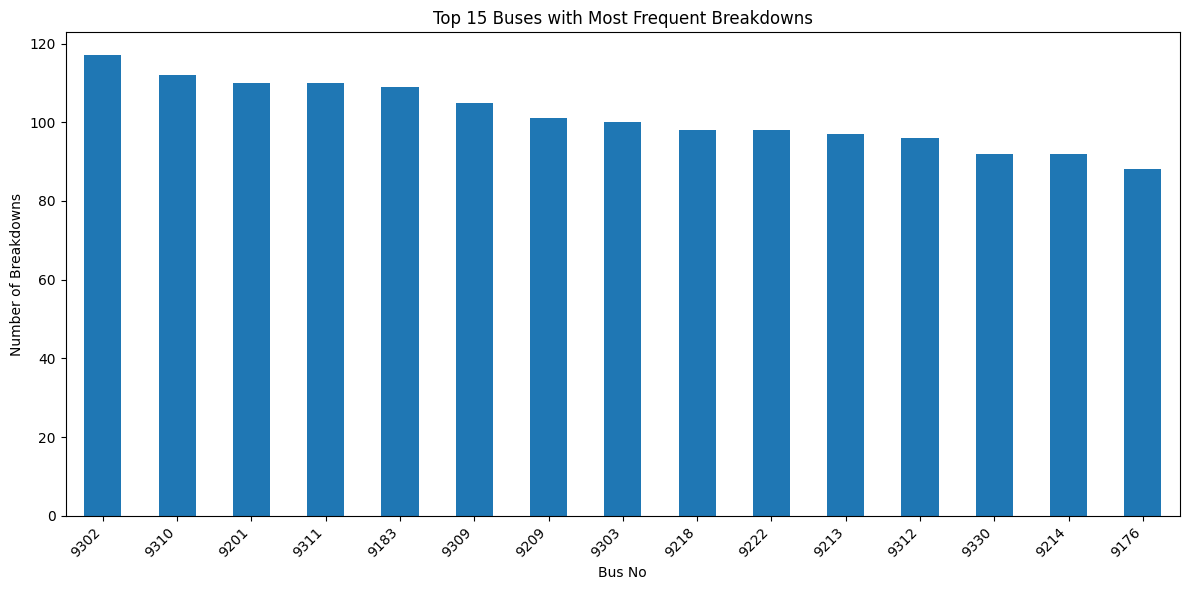

In [ ]:
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

# --- Breakdown Count per Bus Number ---
breakdown_count_per_bus = df.groupby('Bus No').size().sort_values(ascending=False)

print("\nBreakdown Count per Bus Number:")
print(breakdown_count_per_bus)

# Visualize the top N buses with most breakdowns (e.g., top 10)
top_n = 15
plt.figure(figsize=(12, 6))
breakdown_count_per_bus.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Buses with Most Frequent Breakdowns')
plt.xlabel('Bus No')  # Corrected x-axis label
plt.ylabel('Number of Breakdowns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# --- Routes with Highest Breakdowns ---
breakdowns_per_route = df.groupby('Route No').size().sort_values(ascending=False)

print("\nRoutes with Highest Breakdowns:")
print(breakdowns_per_route)


Routes with Highest Breakdowns:
Route No
427/23    82
966/29    70
427/27    70
966/26    70
427/29    69
          ..
 03/5      1
03/05.     1
oms/1A     1
03/01A     1
03/01.     1
Length: 725, dtype: int64


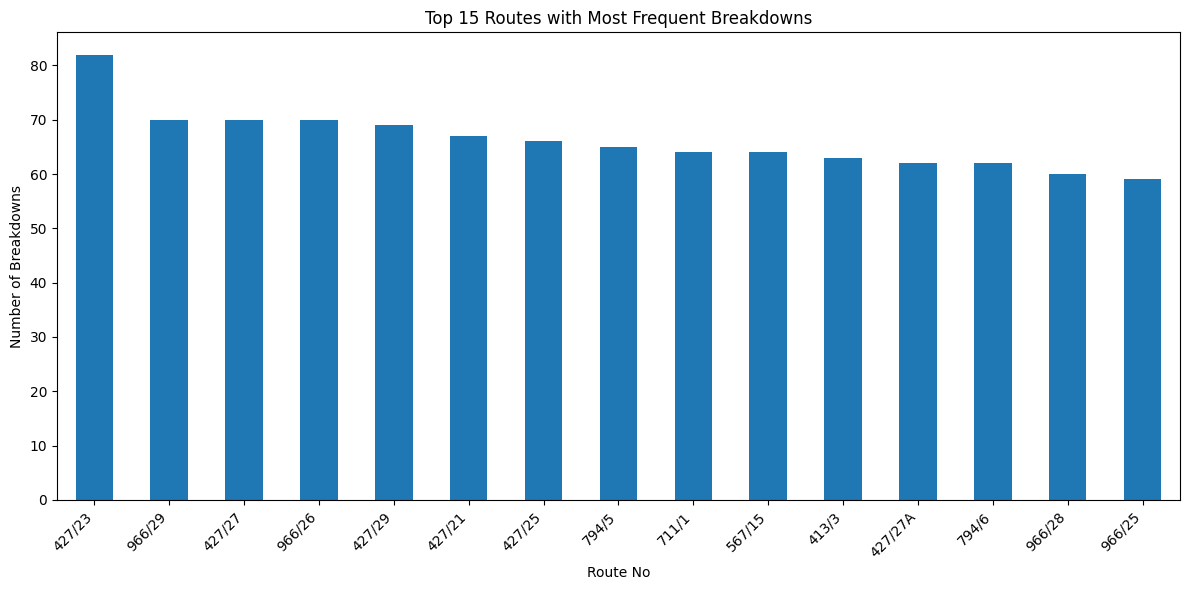

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'breakdowns_per_route' DataFrame from the previous code

# Visualize the top N routes with the most breakdowns
top_n_routes = 15
plt.figure(figsize=(12, 6))
breakdowns_per_route.head(top_n_routes).plot(kind='bar')
plt.title(f'Top {top_n_routes} Routes with Most Frequent Breakdowns')
plt.xlabel('Route No')  # Corrected x-axis label
plt.ylabel('Number of Breakdowns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Frequency Count of Each Grouped Breakdown Reason (AC, Brake, Gear, Pressure issues combined):
Grouped Breakdown Reason
st                     1905
ac issue               1169
lnp                     946
gear defect             863
bellow down             257
                       ... 
rvm rod defect            1
fdisplay nw               1
alternator belt bkn       1
cluster meter nw          1
steering bubbling         1
Name: count, Length: 787, dtype: int64


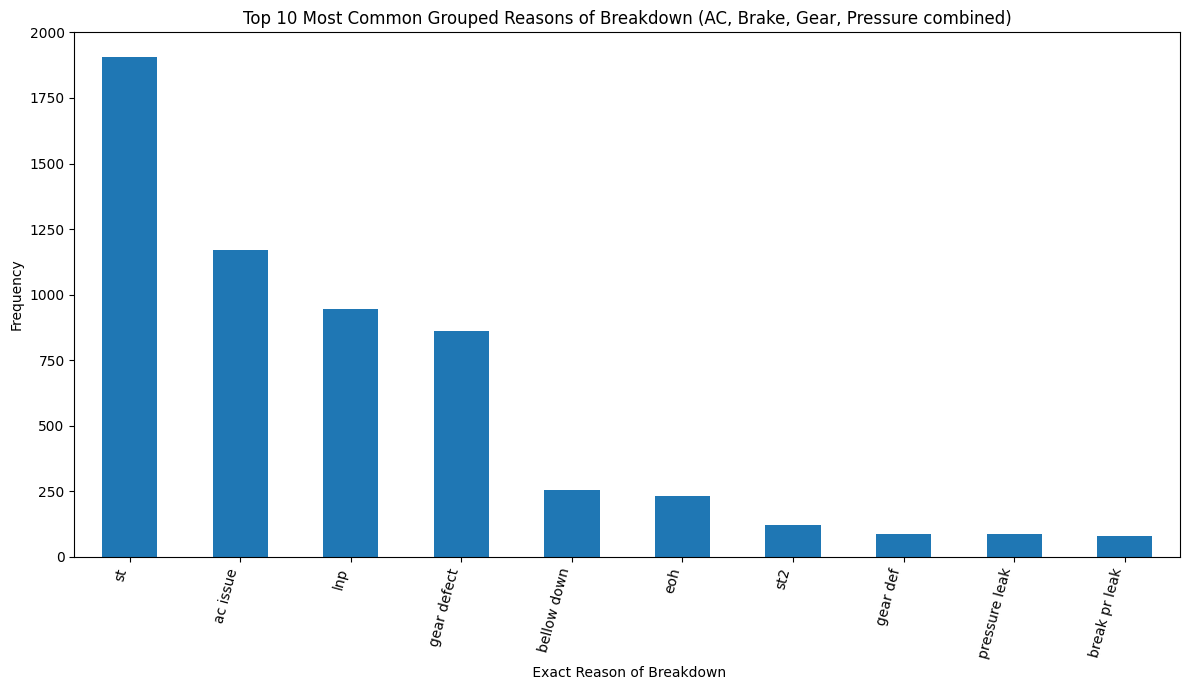

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re  # For regular expressions

# Assuming your data is in a pandas DataFrame called 'df'

def clean_and_group_reasons(reason):
    if isinstance(reason, str):
        reason = reason.lower()
        reason = re.sub(r'[^\w\s]', '', reason)  # Remove punctuation and special chars
        reason = ' '.join(reason.split())  # Normalize whitespace

        if 'ac' in reason or 'aircondition' in reason:
            return 'ac issue'
        elif 'breakprleak' in reason or 'brprleak' in reason:
            return 'brake leak'
        elif 'geardef' in reason or 'geardefect' in reason:
            return 'gear defect'
        elif 'pressureleak' in reason or 'prleak' in reason or 'pr leak' in reason.replace(' ', '') == 'prleak':
            return 'pressure leak'
        return reason
    return reason  # Return as is if not a string

# Apply the cleaning and grouping function to the 'Exact Reason of breakdown' column
df['Grouped Breakdown Reason'] = df['Exact Reason of breakdown'].apply(clean_and_group_reasons)

# --- Frequency Count of Each Grouped Breakdown Reason ---
grouped_reason_frequency = df['Grouped Breakdown Reason'].value_counts().sort_values(ascending=False)

print("\nFrequency Count of Each Grouped Breakdown Reason (AC, Brake, Gear, Pressure issues combined):")
print(grouped_reason_frequency)

# --- Plot Most Common Grouped Breakdown Reasons ---
top_n_reasons = 10  # You can adjust the number of top reasons to display
top_grouped_reasons = grouped_reason_frequency.head(top_n_reasons)

plt.figure(figsize=(12, 7))
top_grouped_reasons.plot(kind='bar')
plt.title(f'Top {top_n_reasons} Most Common Grouped Reasons of Breakdown (AC, Brake, Gear, Pressure combined)')
plt.xlabel(' Exact Reason of Breakdown')
plt.ylabel('Frequency')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-357-24b54d0f143a>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Breakdown Time'] = pd.to_datetime(df['Breakdown Time'], errors='coerce')


Hourly Breakdown Counts:
Breakdown Hour
5.0      22
6.0     246
7.0     576
8.0     788
9.0     864
10.0    779
11.0    609
12.0    379
13.0    243
14.0    173
15.0    280
16.0    467
17.0    512
18.0    601
19.0    555
20.0    381
21.0    167
22.0     73
23.0     20
Name: count, dtype: int64


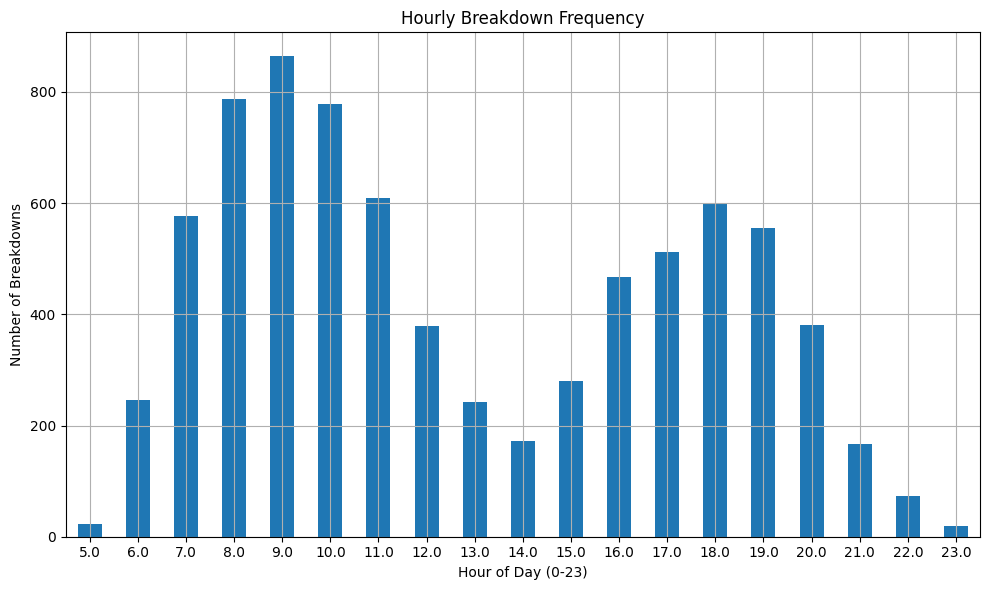

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# --- Question 1: At what times of the day do bus breakdowns most frequently occur? ---
if 'Breakdown Time' in df.columns:
    # Convert 'Breakdown Time' to datetime objects, handling errors
    df['Breakdown Time'] = pd.to_datetime(df['Breakdown Time'], errors='coerce')

    # Extract the hour of the day
    df['Breakdown Hour'] = df['Breakdown Time'].dt.hour

    # Count the number of breakdowns for each hour
    hourly_breakdown_counts = df['Breakdown Hour'].value_counts().sort_index()

    # Print the results
    print("Hourly Breakdown Counts:")
    print(hourly_breakdown_counts)

    # Plot the hourly breakdown counts
    plt.figure(figsize=(10, 6))
    hourly_breakdown_counts.plot(kind='bar')
    plt.title('Hourly Breakdown Frequency')
    plt.xlabel('Hour of Day (0-23)')
    plt.ylabel('Number of Breakdowns')
    plt.xticks(rotation=0)  # Ensure hours are horizontal
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Column 'Breakdown Time' not found in the DataFrame.")

<ipython-input-358-0961c03ae33f>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Put-on road time'] = pd.to_datetime(df['Put-on road time'], errors='coerce')


Average Downtime: 2.04 hours


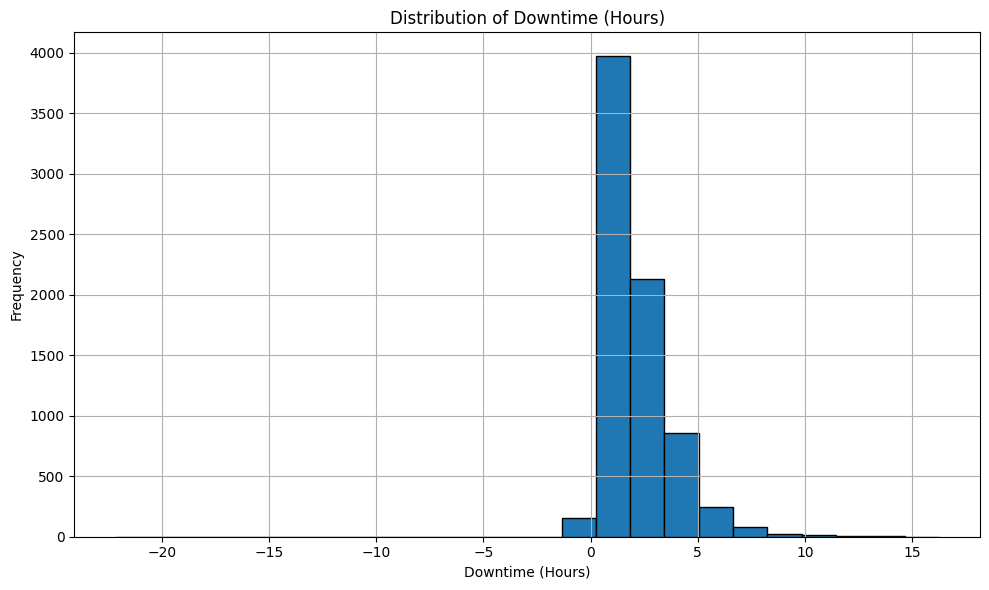

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# --- Question 2: What is the average duration that buses are out of service due to breakdowns? ---
if 'Breakdown Time' in df.columns and 'Put-on road time' in df.columns:
    # Convert 'Breakdown Time' and 'Put-on road time' to datetime objects, handling errors.
    df['Breakdown Time'] = pd.to_datetime(df['Breakdown Time'], errors='coerce')
    df['Put-on road time'] = pd.to_datetime(df['Put-on road time'], errors='coerce')

    # Calculate the duration of each breakdown in hours
    df['Downtime_Hours'] = (df['Put-on road time'] - df['Breakdown Time']).dt.total_seconds() / 3600

    # Calculate the average downtime
    average_downtime = df['Downtime_Hours'].mean()

    # Print the result
    print(f"Average Downtime: {average_downtime:.2f} hours")

    # visualize the distribution of downtime
    plt.figure(figsize=(10,6))
    plt.hist(df['Downtime_Hours'].dropna(), bins=24, edgecolor = 'black') # Added .dropna()
    plt.title('Distribution of Downtime (Hours)')
    plt.xlabel('Downtime (Hours)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("One or both of the columns 'Breakdown Time' and 'Put-on road time' not found in the DataFrame.")

Frequency of Corrective Actions (Case-Insensitive):
 Corrective action taken by DMs
std                     2251
fcv clean                648
code delete              413
cng line clean           395
tcm harness repair       151
                        ... 
fan supporter change       1
oil pack chang             1
magnet wire repaired       1
icm cold                   1
300 amp replace            1
Name: count, Length: 854, dtype: int64


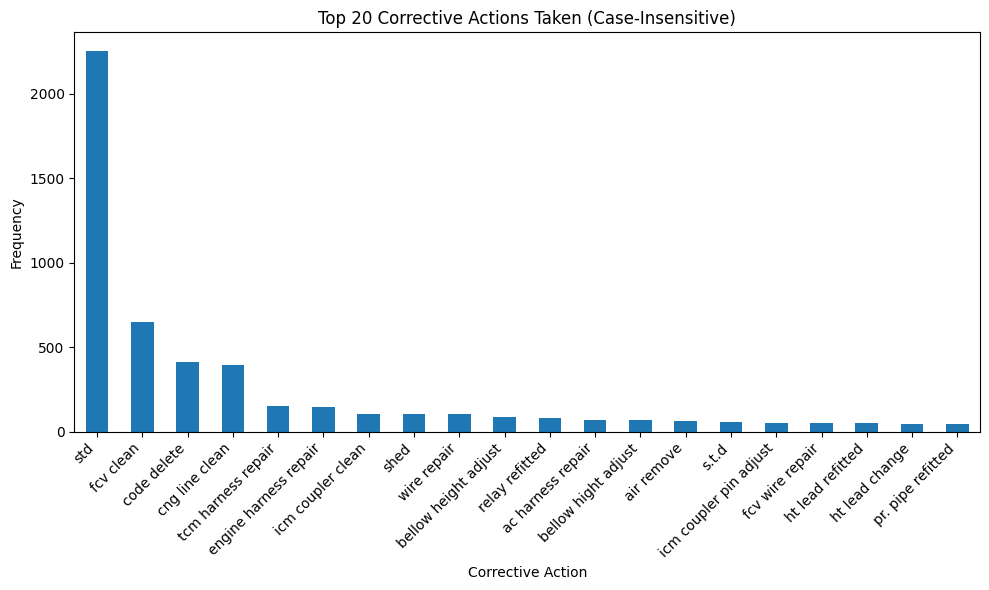

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Convert the column to lowercase to handle case variations
df['Corrective action taken by DMs'] = df['Corrective action taken by DMs'].astype(str).str.lower().str.strip()

action_counts = df['Corrective action taken by DMs'].value_counts().sort_values(
    ascending=False
)
print('Frequency of Corrective Actions (Case-Insensitive):\n', action_counts)

# Visualize the top N corrective actions
top_n = 20  # Adjust as needed
plt.figure(figsize=(10, 6))
action_counts.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Corrective Actions Taken (Case-Insensitive)')
plt.xlabel('Corrective Action')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Corrective Actions by Breakdown Reason:
 Exact Reason of breakdown  Corrective action taken by DMs
2 SEAT BKN.                std                               1
A/C ,LNP                   gasmas clean                      1
A/C DEF.                   ac harness repair                 1
A/C N/W                    ac harness repair                 2
                           ac harness repaired               1
                                                            ..
WIPPER N/W                 wire repaired                     1
WIPPER NOT WORK            wipper motor wire repair          1
WIRE SHOT                  std                               1
WIRING SHORT               wire repair                       1
WIRING SHORT/S.T           std                               1
Name: count, Length: 2627, dtype: int64


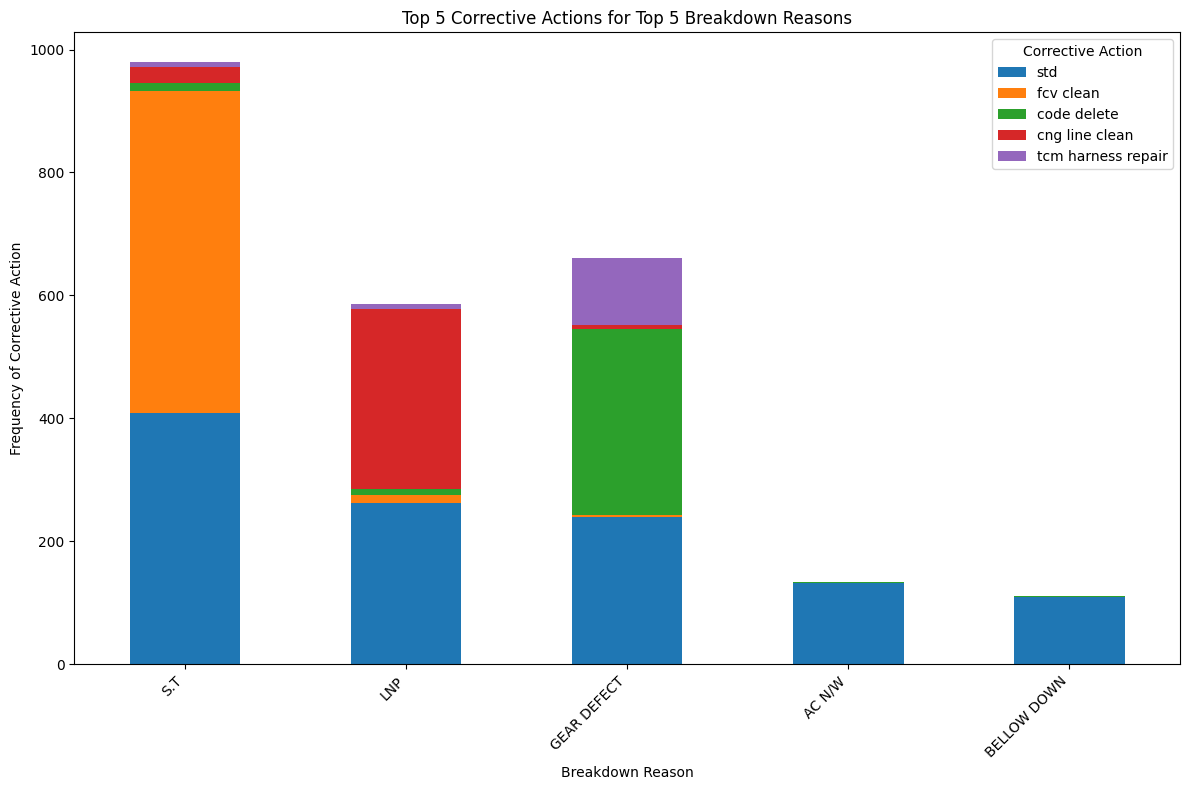

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

def fix_lnp_names(reason):
    """Standardizes 'LNP' and 'L.N.P' to 'LNP'."""
    if isinstance(reason, str):  # Check if the value is a string
        return reason.replace("L.N.P", "LNP").strip().upper()
    return reason # Return the original value if not a string

# Apply the function to standardize the 'Exact Reason of breakdown' column
df['Exact Reason of breakdown'] = df['Exact Reason of breakdown'].apply(fix_lnp_names)

# Group by the standardized breakdown reason and count corrective actions
action_by_reason = df.groupby('Exact Reason of breakdown')[
    'Corrective action taken by DMs'
].value_counts()
print('Corrective Actions by Breakdown Reason:\n', action_by_reason)

# Visualize using a stacked bar chart (example for top 5 breakdown reasons)

# Get the top 5 corrective actions
top_corrective_actions = df['Corrective action taken by DMs'].value_counts().head(5).index

# Get the top 5 breakdown reasons
top_reasons = (
    df['Exact Reason of breakdown'].value_counts().head(5).index
)
action_by_reason_top = action_by_reason.loc[
    top_reasons
]

# Unstack the Series to create a DataFrame suitable for stacked bar chart
action_by_reason_top_unstacked = action_by_reason_top.unstack(fill_value=0)

# Filter the unstacked DataFrame to include only the top 5 corrective actions
action_by_reason_top_filtered = action_by_reason_top_unstacked[top_corrective_actions]


action_by_reason_top_filtered.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 Corrective Actions for Top 5 Breakdown Reasons')
plt.xlabel('Breakdown Reason')
plt.ylabel('Frequency of Corrective Action')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Corrective Action')
plt.tight_layout()
plt.show()

Average Downtime (Hours) Comparison:
 Is_Repeated
Single      2.019513
Repeated    2.058049
Name: Downtime_Hours, dtype: float64


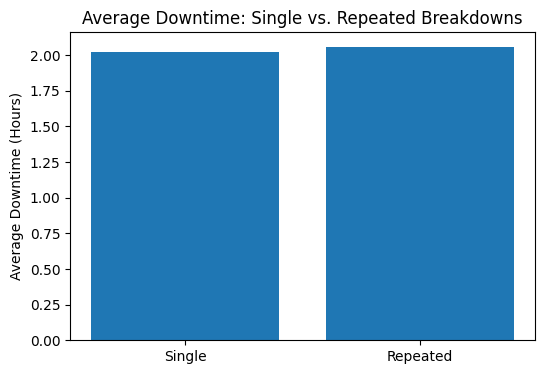

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def is_repeated(x):
    if isinstance(x, (int, float)):  # Check if x is a number
        return x > 1
    return 'repeated' in str(x).lower()

df['Is_Repeated'] = df['Repeated or single instance during the week'].apply(is_repeated)

# Convert time columns to datetime (if they aren't already)
df['Breakdown Time'] = pd.to_datetime(df['Breakdown Time'], errors='coerce')
df['Put-on road time'] = pd.to_datetime(df['Put-on road time'], errors='coerce')

# Calculate downtime
df['Downtime_Hours'] = (df['Put-on road time'] - df['Breakdown Time']).dt.total_seconds() / 3600

# Group by 'Is_Repeated' and calculate average downtime
avg_downtime_comparison = df.groupby('Is_Repeated')['Downtime_Hours'].mean()
avg_downtime_comparison = avg_downtime_comparison.rename({False: 'Single', True: 'Repeated'})

print("Average Downtime (Hours) Comparison:\n", avg_downtime_comparison)

# Visualize
plt.figure(figsize=(6, 4))
plt.bar(['Single', 'Repeated'], [avg_downtime_comparison['Single'], avg_downtime_comparison['Repeated']])
plt.title('Average Downtime: Single vs. Repeated Breakdowns')
plt.ylabel('Average Downtime (Hours)')
plt.show()

Breakdown Location Frequency Table:
 Breakdown location
Nehru Place            445
Mehrauli (T)           285
Sarai Kale Khan        246
Nizamuddin Rly Stn     244
H.NZMD.Rly.Stn.        201
                      ... 
Lodhi Hotel              1
Tuglak Road              1
Panchsheel Flyover       1
Mangol Puri Flyover      1
Kalyan Puri Xing         1
Name: count, Length: 1742, dtype: int64


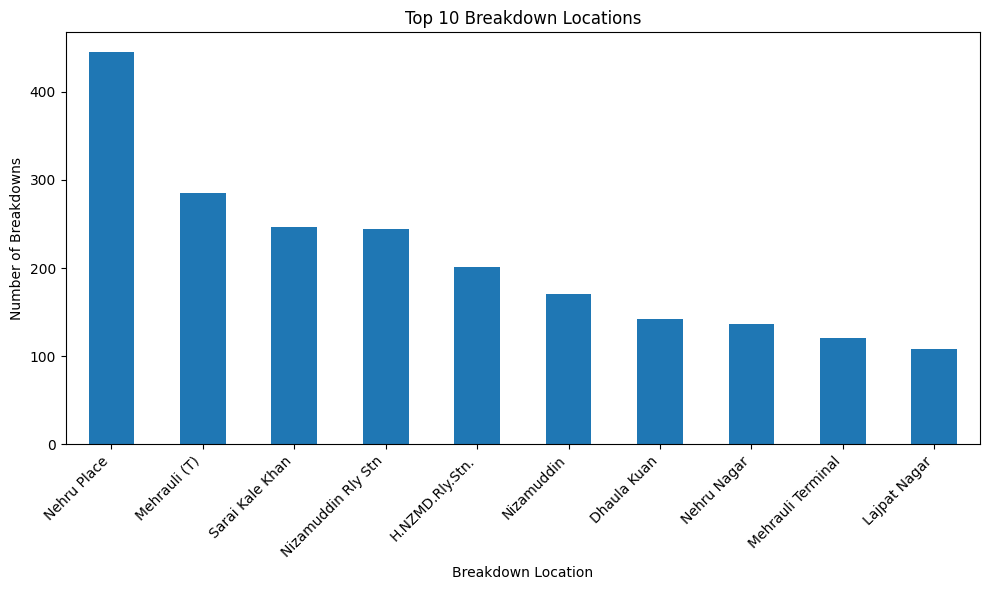

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Frequency Table and Bar Chart
location_counts = df['Breakdown location'].value_counts().sort_values(ascending=False)
print("Breakdown Location Frequency Table:\n", location_counts)

plt.figure(figsize=(10, 6))
location_counts.head(10).plot(kind='bar')  # Show top 10 locations
plt.title('Top 10 Breakdown Locations')
plt.xlabel('Breakdown Location')
plt.ylabel('Number of Breakdowns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
#Preprocessing for ML algorithms
# 2. Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Convert time columns to datetime, handling errors by coercing invalid values to NaT
df['Breakdown Time'] = pd.to_datetime(df['Breakdown Time'], errors='coerce')
df['Put-on road time'] = pd.to_datetime(df['Put-on road time'], errors='coerce')

# Calculate downtime in hours, handle potential NaT values from conversion errors
df['Downtime_Hours'] = (df['Put-on road time'] - df['Breakdown Time']).dt.total_seconds() / 3600
df['Downtime_Hours'] = df['Downtime_Hours'].fillna(0)  #  Impute NaT with 0

# Extract hour of day from Breakdown Time
df['HourOfDay'] = df['Breakdown Time'].dt.hour
df['MonthYear'] = df['Date'].astype(str)

# Select features and target variable.
features = ['Bus No', 'Route No', 'SchKMs', 'ActKMs', 'HourOfDay', 'Exact Reason of breakdown', 'MonthYear']
target = 'Downtime_Hours'

# Separate features (X) and target (y)
X = df[features]
y = df[target]

# Identify numerical and categorical columns
numerical_cols = ['SchKMs', 'ActKMs', 'HourOfDay']
categorical_cols = ['Bus No', 'Route No', 'Exact Reason of breakdown', 'MonthYear']

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming X_train and X_test are your training and testing feature DataFrames
# and y_train is your training target variable.

# 1. Replace 'NIL' with np.nan everywhere
X_train = X_train.replace('NIL', np.nan)
X_test = X_test.replace('NIL', np.nan)

# 2. Convert numeric columns properly
cols_to_numeric = ['Bus No', 'Route No', 'SchKMs', 'ActKMs', 'Miss KMs due to BD only', 'Other Reasons']
for col in cols_to_numeric:
    if col in X_train.columns:
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    if col in X_test.columns:
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# 3. Now define correct numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Ensure that the target variable 'Downtime_Hours' is not included in the features
if 'Downtime_Hours' in numerical_cols:
    numerical_cols = numerical_cols.drop('Downtime_Hours')

# 4. Build preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 5. Create and fit model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

<ipython-input-364-88194cf2ca38>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.replace('NIL', np.nan)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Bus No', 'Route No', 'SchKMs', 'ActKMs', 'HourOfDay'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Exact Reason of breakdown', 'MonthYear'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
# 5. Feature Importance (Interpretation)
# Get feature names after one-hot encoding
feature_names = model.named_steps['preprocessor'].get_feature_names_out(input_features=features)
if hasattr(model.named_steps['regressor'], 'coef_'):
    importances = model.named_steps['regressor'].coef_
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    print("Feature Importances:\n", feature_importance)
else:
    print("LinearRegression model does not have coef_ attribute.  Cannot show feature importances.")


Feature Importances:
                                                Feature  Importance
811  cat__Exact Reason of breakdown_S.T,GEAR DEFECT...   10.206413
862       cat__Exact Reason of breakdown_STREEING FAIL    7.107615
247   cat__Exact Reason of breakdown_E.O.H,GATE DEFECT    6.513870
818        cat__Exact Reason of breakdown_S.T- 2 + LNP    5.535050
654    cat__Exact Reason of breakdown_R/O/TYRE PUNCHAR    5.315676
..                                                 ...         ...
265  cat__Exact Reason of breakdown_ENGINE FAN BELT...   -2.936311
557  cat__Exact Reason of breakdown_LNP,WATER PUMP ...   -3.010955
323     cat__Exact Reason of breakdown_F/R/S WHEEL JAM   -3.097202
10      cat__Exact Reason of breakdown_A/C NOT WORKING   -3.219175
637         cat__Exact Reason of breakdown_R/BUS SOUND   -3.690681

[1142 rows x 2 columns]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.10432567044624297
Mean Absolute Error: 1.1436160434535048
Root Mean Squared Error: 1.4766953998441272


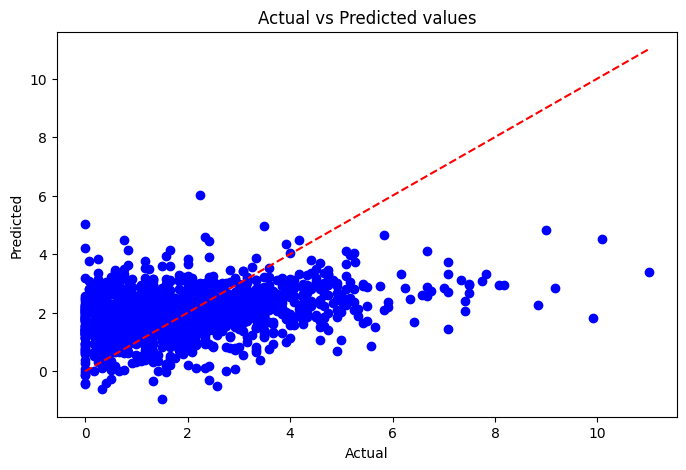

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


def predict_missed_kilometers_random_forest(df):
    """
    Predicts the number of missed kilometers using a Random Forest Regressor.

    Args:
        df (pd.DataFrame): The input DataFrame containing bus breakdown data.
        It should contain the columns 'SchKMs', 'Act_No', and other
        relevant features like 'Bus_No', 'Route_No', 'HourOfDay',
        'Exact_Reason_of_breakdown', and 'MonthYear'.

    Returns:
        pd.DataFrame: A DataFrame containing the actual missed kilometers
        from the test set and the predictions from the Random Forest Regressor.
        Returns None if the input DataFrame is invalid.
    """
    # 1. Data Validation and Preparation
    if not isinstance(df, pd.DataFrame):
        print("Error: Input 'df' must be a pandas DataFrame.")
        return None

    required_cols = ['SchKMs', 'Act_No', 'Bus_No', 'Route_No', 'Breakdown_Time', 'Exact_Reason_of_breakdown', 'Date']
    if not all(col in df.columns for col in required_cols):
        print(
            f"Error: Input DataFrame is missing one or more required columns.  Required columns are: {required_cols}")
        return None

    # Create the target variable: Missed Kilometers
    df['Missed_KMs'] = df['SchKMs'] - df['Act_No']

    #  Handle potential NaN values in 'Missed_KMs'
    df['Missed_KMs'] = df['Missed_KMs'].fillna(0)

    # Extract hour of day from Breakdown_Time
    df['HourOfDay'] = pd.to_datetime(df['Breakdown_Time'], errors='coerce').dt.hour
    df['MonthYear'] = df['Date'].astype(str)

    # Select features and target variable.
    features = ['Bus_No', 'Route_No', 'SchKMs', 'Act_No', 'HourOfDay', 'Exact_Reason_of_breakdown', 'MonthYear']
    target = 'Missed_KMs'

    # Separate features (X) and target (y)
    X = df[features]
    y = df[target]

    # Identify numerical and categorical columns
    numerical_cols = ['SchKMs', 'Act_No', 'HourOfDay']
    categorical_cols = ['Bus_No', 'Route_No', 'Exact_Reason_of_breakdown', 'MonthYear']

    # 2. Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    # 3. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Define the Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators

    # 5. Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

    # 6. Train the model
    pipeline.fit(X_train, y_train)

    # 7. Make predictions
    y_pred = pipeline.predict(X_test)

    # 8. Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Random Forest Regressor Model Evaluation Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")

    # 9. Create a DataFrame to hold the results
    results_df = pd.DataFrame({
        'Actual_Missed_KMs': y_test,
        'Random_Forest_Predictions': y_pred,
    })

    return results_df  # Return the DataFrame with predictions


if __name__ == '__main__':

    results_df = predict_missed_kilometers_random_forest(df.copy())  # Pass a copy to avoid modifying the original DataFrame
    if results_df is not None:
        print("\nRandom Forest Regressor Predictions:")
        print(results_df)


Error: Input DataFrame is missing one or more required columns.  Required columns are: ['SchKMs', 'Act_No', 'Bus_No', 'Route_No', 'Breakdown_Time', 'Exact_Reason_of_breakdown', 'Date']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support


def predict_maintenance_status_knn(df):
    """
    Predicts the maintenance status using a K-Nearest Neighbors Classifier.

    Args:
        df (pd.DataFrame): The input DataFrame containing bus maintenance data.
            It should contain columns like 'SchKMs', 'Act_No', 'Bus_No', 'Route_No',
            'Breakdown_Time', 'Exact_Reason_of_breakdown', 'Date', and
            'Maintenance_Status'.

    Returns:
        pd.DataFrame: A DataFrame containing the actual maintenance status
            from the test set and the predictions from the KNN Classifier.
            Returns None if the input DataFrame is invalid.
    """
    # 1. Data Validation and Preparation
    if not isinstance(df, pd.DataFrame):
        print("Error: Input 'df' must be a pandas DataFrame.")
        return None

    required_cols = ['SchKMs', 'Act_No', 'Bus_No', 'Route_No', 'Breakdown_Time', 'Exact_Reason_of_breakdown', 'Date',
                     'Maintenance_Status']
    if not all(col in df.columns for col in required_cols):
        print(
            f"Error: Input DataFrame is missing one or more required columns. Required columns are: {required_cols}")
        return None

    # Handle potential missing values before feature engineering
    df_cleaned = df.copy()
    for col in ['SchKMs', 'Act_No']:  # Corrected column name
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    df_cleaned.dropna(
        subset=['SchKMs', 'Act_No', 'Breakdown_Time', 'Exact_Reason_of_breakdown', 'Date',
                'Maintenance_Status'], inplace=True)  # Corrected column name

    # Feature Engineering
    df_cleaned['HourOfDay'] = pd.to_datetime(df_cleaned['Breakdown_Time'], errors='coerce').dt.hour
    df_cleaned['MonthYear'] = df_cleaned['Date'].astype(str)

    # Select features and target variable.
    features = ['Bus_No', 'Route_No', 'SchKMs', 'Act_No', 'HourOfDay', 'Exact_Reason_of_breakdown',
                'MonthYear']  # Corrected column name
    target = 'Maintenance_Status'  # target

    # Separate features (X) and target (y)
    X = df_cleaned[features]
    y = df_cleaned[target]

    # Identify numerical and categorical columns
    numerical_cols = ['SchKMs', 'Act_No', 'HourOfDay']  # Corrected column name
    categorical_cols = ['Bus_No', 'Route_No', 'Exact_Reason_of_breakdown', 'MonthYear']

    # 2. Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    # 3. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Added stratify

    # 4. Define the KNN Classifier model
    model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors

    # 5. Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # 6. Train the model
    pipeline.fit(X_train, y_train)

    # 7. Make predictions
    y_pred = pipeline.predict(X_test)

    # 8. Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted',
                                                                  zero_division=0)  # Added zero_division
    print("K-Nearest Neighbors Classifier Model Evaluation Metrics:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")

    # 9. Create a DataFrame to hold the results
    results_df = pd.DataFrame({
        'Actual_Maintenance_Status': y_test,
        'KNN_Predictions': y_pred,
    })

    return results_df  # Return the DataFrame


if __name__ == '__main__':

    df = pd.DataFrame(data)

    results_df = predict_maintenance_status_knn(df.copy())
    if results_df is not None:
        print("\nK-Nearest Neighbors Classifier Predictions:")
        print(results_df)




ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.impute import SimpleImputer

def predict_maintenance_status_svm(df):
    """
    Predicts the maintenance status using a Support Vector Machine Classifier.

    Args:
        df (pd.DataFrame): The input DataFrame containing bus maintenance data.
            It should contain columns like 'SchKMs', 'ActKMs', 'Bus_No', 'Route_No',
            'Breakdown_Time', 'Exact_Reason_of_breakdown', 'Date', and
            'Maintenance_Status'.

    Returns:
        pd.DataFrame: A DataFrame containing the actual maintenance status
            from the test set and the predictions from the SVM Classifier.
            Returns None if the input DataFrame is invalid or training fails.
    """
    # 1. Data Validation and Preparation
    if not isinstance(df, pd.DataFrame):
        print("Error: Input 'df' must be a pandas DataFrame.")
        return None

    required_cols = ['SchKMs', 'Act_No', 'Bus_No', 'Route_No', 'Breakdown_Time', 'Exact_Reason_of_breakdown', 'Date', 'Maintenance_Status'] # Corrected column name
    if not all(col in df.columns for col in required_cols):
        print(f"Error: Input DataFrame is missing one or more required columns. Required columns are: {required_cols}")
        return None

    # Handle potential missing values before feature engineering
    df_cleaned = df.copy()
    for col in ['SchKMs', 'Act_No']: # Corrected column name
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    df_cleaned.dropna(subset=['SchKMs', 'Act_No', 'Breakdown_Time', 'Exact_Reason_of_breakdown', 'Date', 'Maintenance_Status'], inplace=True) # Corrected column name

    # Feature Engineering
    df_cleaned['HourOfDay'] = pd.to_datetime(df_cleaned['Breakdown_Time'], errors='coerce').dt.hour
    df_cleaned['MonthYear'] = df_cleaned['Date'].astype(str)

    # Select features and target variable.
    features = ['Bus_No', 'Route_No', 'SchKMs', 'Act_No', 'HourOfDay', 'Exact_Reason_of_breakdown', 'MonthYear'] # Corrected column name
    target = 'Maintenance_Status'

    # Separate features (X) and target (y)
    X = df_cleaned[features]
    y = df_cleaned[target]

    # Identify numerical and categorical columns
    numerical_cols = ['SchKMs', 'Act_No', 'HourOfDay'] # Corrected column name
    categorical_cols = ['Bus_No', 'Route_No', 'Exact_Reason_of_breakdown', 'MonthYear']

    # 2. Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    # 3. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 4. Define the SVM Classifier model
    model = SVC(kernel='linear', random_state=42)  # Consider other kernels like 'rbf'

    # 5. Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    try:
        # 6. Train the model
        pipeline.fit(X_train, y_train)

        # 7. Make predictions
        y_pred = pipeline.predict(X_test)

        # 8. Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)
        print("Support Vector Machine Classifier Model Evaluation Metrics:")
        print(f"  Accuracy: {accuracy:.2f}")
        print(f"  Precision: {precision:.2f}")
        print(f"  Recall: {recall:.2f}")
        print(f"  F1-score: {f1:.2f}")

        # 9. Create a DataFrame to hold the results
        results_df = pd.DataFrame({
            'Actual_Maintenance_Status': y_test,
            'SVM_Predictions': y_pred,
        })

        return results_df

    except Exception as e:
        print(f"An error occurred during training or prediction: {e}")
        return None

if __name__ == '__main__':

    results_df = predict_maintenance_status_svm(df.copy())
    if results_df is not None:
        print("\nSupport Vector Machine Classifier Predictions:")
        print(results_df)
